<a href="https://colab.research.google.com/github/vijay9119y/Time_series_analysis_projects/blob/main/AxisBank_Stock_TimeSeries_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np               # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
import datetime as dt
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
%matplotlib inline

import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")


# Settings for pretty nice plots
plt.style.use('fivethirtyeight')
plt.show()

In [3]:
df = pd.read_csv("AXISBANK.csv")

In [4]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN


In [5]:
data = df[['Date','Open','High','Low','Close','Volume','VWAP']]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5306 non-null   object 
 1   Open    5306 non-null   float64
 2   High    5306 non-null   float64
 3   Low     5306 non-null   float64
 4   Close   5306 non-null   float64
 5   Volume  5306 non-null   int64  
 6   VWAP    5306 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 290.3+ KB


In [7]:
data['Date'] = data['Date'].apply(pd.to_datetime)
data.head()

,Date,Open,High,Low,Close,Volume,VWAP
0,2000-01-03,26.7,26.70,26.70,26.70,112100,26.70
1,2000-01-04,27.0,28.70,26.50,26.85,234500,27.24
2,2000-01-05,26.0,27.75,25.50,26.30,170100,26.24
3,2000-01-06,25.8,27.00,25.80,25.95,102100,26.27
4,2000-01-07,25.0,26.00,24.25,24.80,62600,25.04


In [8]:
from datetime import datetime
my_year = 2019
my_month = 4
my_day = 21
my_hour = 10
my_minute = 5
my_second = 30

In [9]:
test_date = datetime(my_year, my_month, my_day)
test_date

datetime.datetime(2019, 4, 21, 0, 0)

In [10]:
test_date = datetime(my_year, my_month, my_day, my_hour, my_minute, my_second)
print('The day is : ', test_date.day)
print('The hour is : ', test_date.hour)
print('The month is : ', test_date.month)

The day is :  21
The hour is :  10
The month is :  4


#**Feature Extraction**

In [11]:
print(data.index.max())
print(data.index.min())

5305
0


In [12]:
# Earliest date index location
print('Earliest date index location is: ',data.index.argmin())

# Latest date location
print('Latest date location: ',data.index.argmax())

Earliest date index location is:  0
Latest date location:  5305


In [13]:
df_vwap = df[['Date','VWAP']]
df_vwap['Date'] = df_vwap['Date'].apply(pd.to_datetime)
df_vwap.head()

,Date,VWAP
0,2000-01-03,26.70
1,2000-01-04,27.24
2,2000-01-05,26.24
3,2000-01-06,26.27
4,2000-01-07,25.04


In [14]:
df_vwap['year'] = df_vwap.Date.dt.year
df_vwap['month'] = df_vwap.Date.dt.month
df_vwap['day'] = df_vwap.Date.dt.day
df_vwap['day of week'] = df_vwap.Date.dt.dayofweek

#Set Date column as the index column.
df_vwap.set_index('Date', inplace=True)
df_vwap.head()

,VWAP,year,month,day,day of week
Date,,,,,
2000-01-03,26.70,2000,1,3,0
2000-01-04,27.24,2000,1,4,1
2000-01-05,26.24,2000,1,5,2
2000-01-06,26.27,2000,1,6,3
2000-01-07,25.04,2000,1,7,4


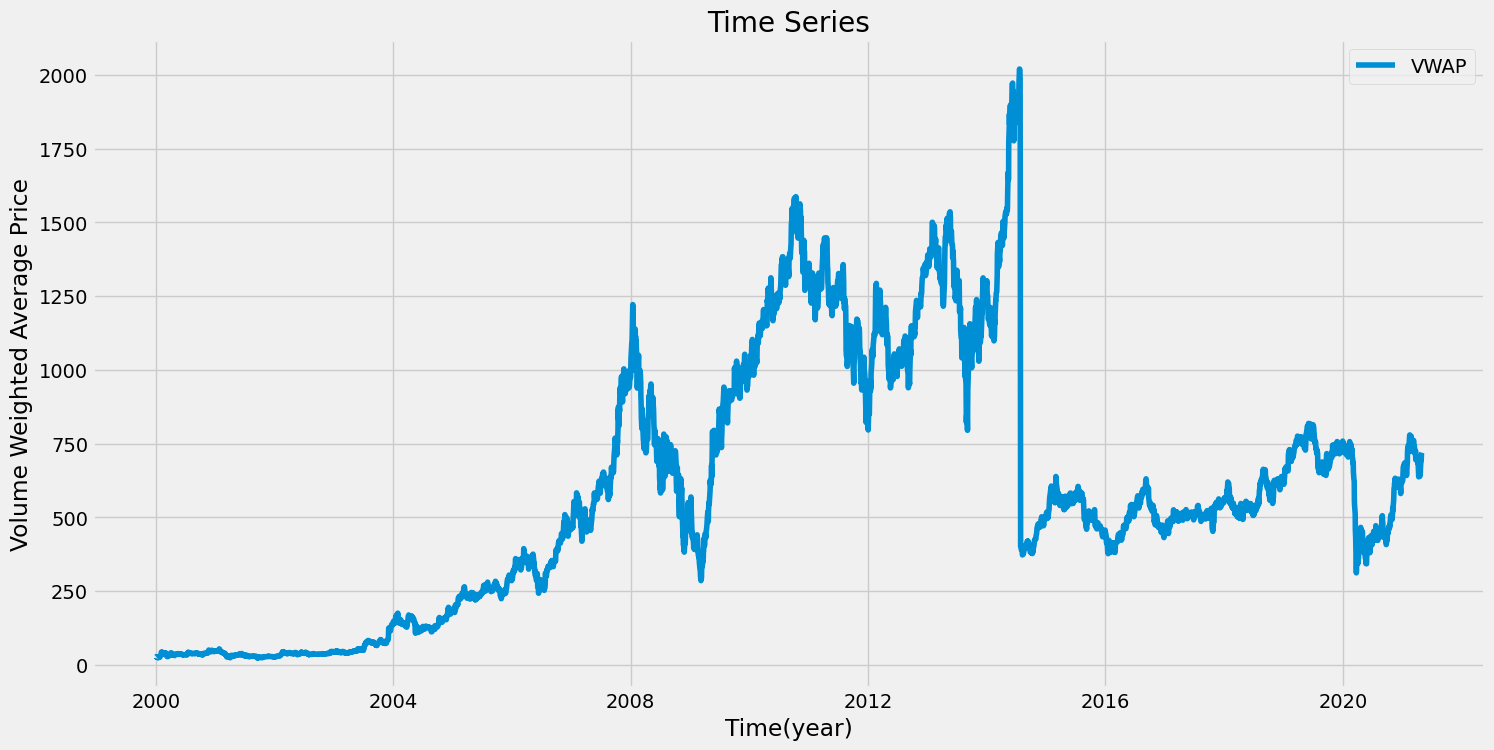

In [15]:
# Visualising the VWAP

plt.figure(figsize=(16,8))
plt.plot(df_vwap['VWAP'], label='VWAP')
plt.title('Time Series')
plt.xlabel("Time(year)")
plt.ylabel("Volume Weighted Average Price")
plt.legend(loc='best')

#**Exploratory Data Analysis**

<Axes: xlabel='year'>

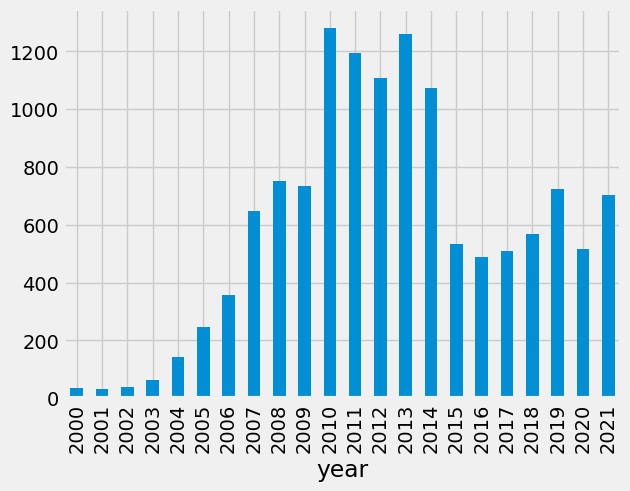

In [16]:
# Yearly VWAP of AXISBANK Stocks

df_vwap.groupby('year')['VWAP'].mean().plot.bar()

<Axes: xlabel='month'>

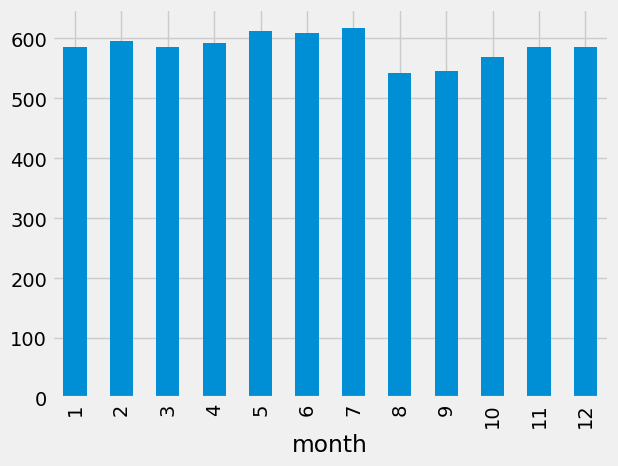

In [17]:
# Monthly VWAP of AXISBANK Stocks

df_vwap.groupby('month')['VWAP'].mean().plot.bar()

<Axes: xlabel='day'>

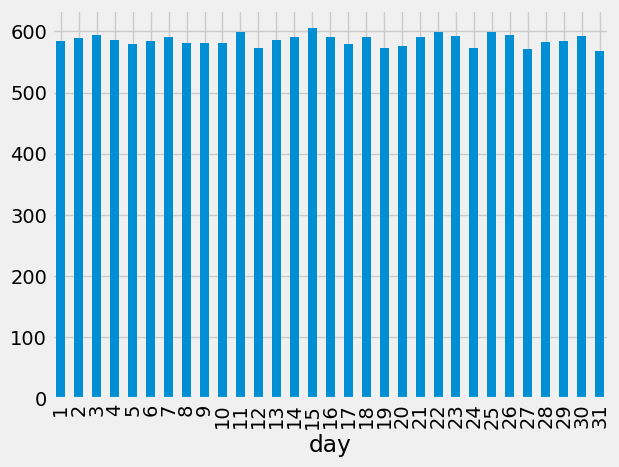

In [18]:
# Daily VWAP of AXISBANK Stocks

df_vwap.groupby('day')['VWAP'].mean().plot.bar()

<Axes: xlabel='day of week'>

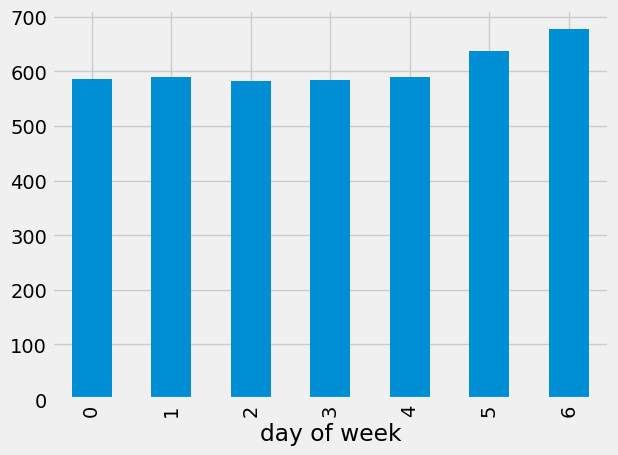

In [19]:
# Analysing w.r.t day of the week

df_vwap.groupby('day of week')['VWAP'].mean().plot.bar()

#**Time resampling**

In [20]:
df_vwap.resample(rule = 'A').mean()[:5]

,VWAP,year,month,day,day of week
Date,,,,,
2000-12-31,36.547080,2000.0,6.536000,15.888000,2.004000
2001-12-31,31.569032,2001.0,6.439516,15.778226,1.971774
2002-12-31,37.076653,2002.0,6.446215,15.745020,2.003984
2003-12-31,63.803425,2003.0,6.555118,15.854331,2.007874
2004-12-31,142.433583,2004.0,6.559055,15.708661,2.047244


Text(0.5, 1.0, 'Yearly Mean VWAP for AXISBANK')

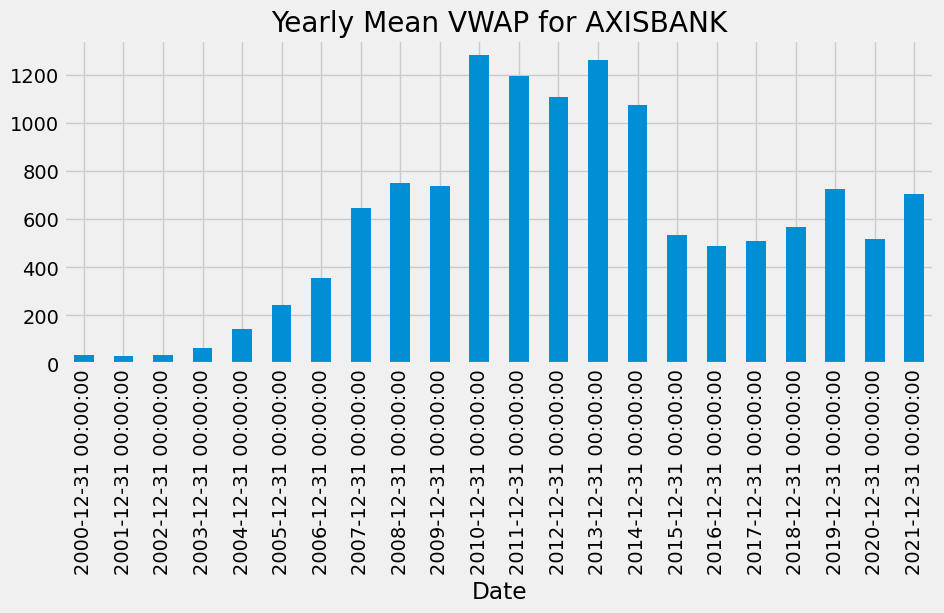

In [21]:
df_vwap['VWAP'].resample('A').mean().plot(kind='bar',figsize = (10,4))
plt.title('Yearly Mean VWAP for AXISBANK')

Text(0.5, 1.0, 'Yearly start Mean VWAP for AXISBANK')

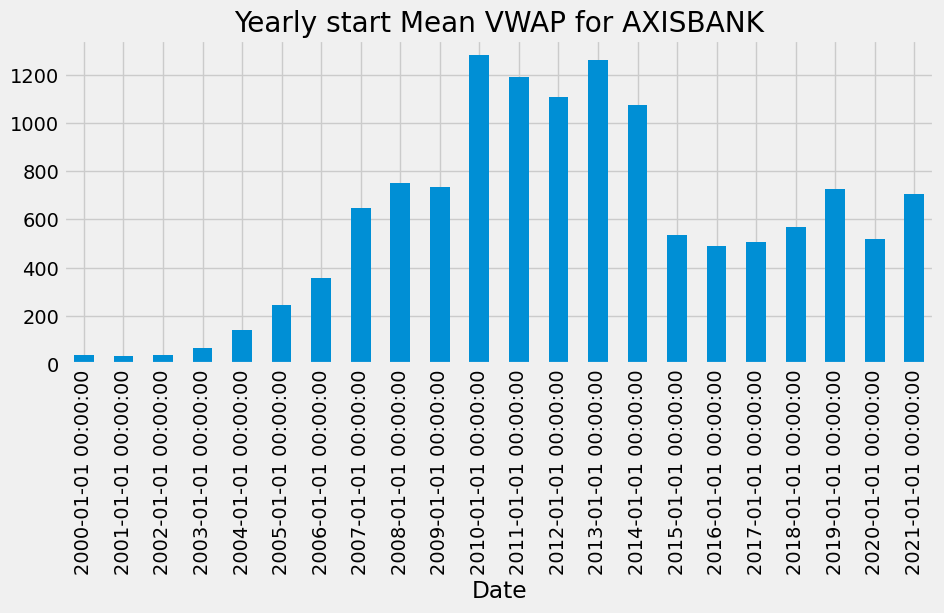

In [22]:
df_vwap['VWAP'].resample('AS').mean().plot(kind='bar',figsize = (10,4))
plt.title('Yearly start Mean VWAP for AXISBANK')

#**Time Shifting**

In [23]:
df_vwap.head()

,VWAP,year,month,day,day of week
Date,,,,,
2000-01-03,26.70,2000,1,3,0
2000-01-04,27.24,2000,1,4,1
2000-01-05,26.24,2000,1,5,2
2000-01-06,26.27,2000,1,6,3
2000-01-07,25.04,2000,1,7,4


#**Forward Shifting**

In [24]:
df_vwap.shift(1).head()

,VWAP,year,month,day,day of week
Date,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN
2000-01-04,26.70,2000.0,1.0,3.0,0.0
2000-01-05,27.24,2000.0,1.0,4.0,1.0
2000-01-06,26.24,2000.0,1.0,5.0,2.0
2000-01-07,26.27,2000.0,1.0,6.0,3.0


#**Backwards shifting**

In [25]:
df_vwap.shift(-1).head()

,VWAP,year,month,day,day of week
Date,,,,,
2000-01-03,27.24,2000.0,1.0,4.0,1.0
2000-01-04,26.24,2000.0,1.0,5.0,2.0
2000-01-05,26.27,2000.0,1.0,6.0,3.0
2000-01-06,25.04,2000.0,1.0,7.0,4.0
2000-01-07,25.29,2000.0,1.0,10.0,0.0


#*Shifting based off time string code*

In [26]:
df_vwap.tshift(periods=3, freq = 'M').head()

,VWAP,year,month,day,day of week
Date,,,,,
2000-03-31,26.70,2000,1,3,0
2000-03-31,27.24,2000,1,4,1
2000-03-31,26.24,2000,1,5,2
2000-03-31,26.27,2000,1,6,3
2000-03-31,25.04,2000,1,7,4


#**Rolling windows**

<Axes: xlabel='Date'>

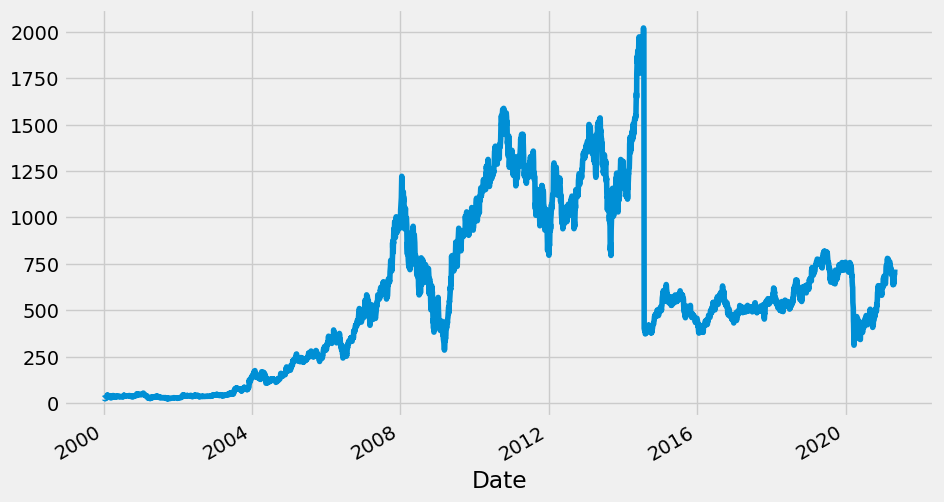

In [27]:
df_vwap['VWAP'].plot(figsize = (10,6))

In [28]:
df_vwap.rolling(7).mean().head(10)

,VWAP,year,month,day,day of week
Date,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN,NaN
2000-01-11,25.811429,2000.0,1.0,6.571429,1.571429
2000-01-12,25.421429,2000.0,1.0,7.857143,1.857143
2000-01-13,24.925714,2000.0,1.0,9.142857,2.142857


<Axes: xlabel='Date'>

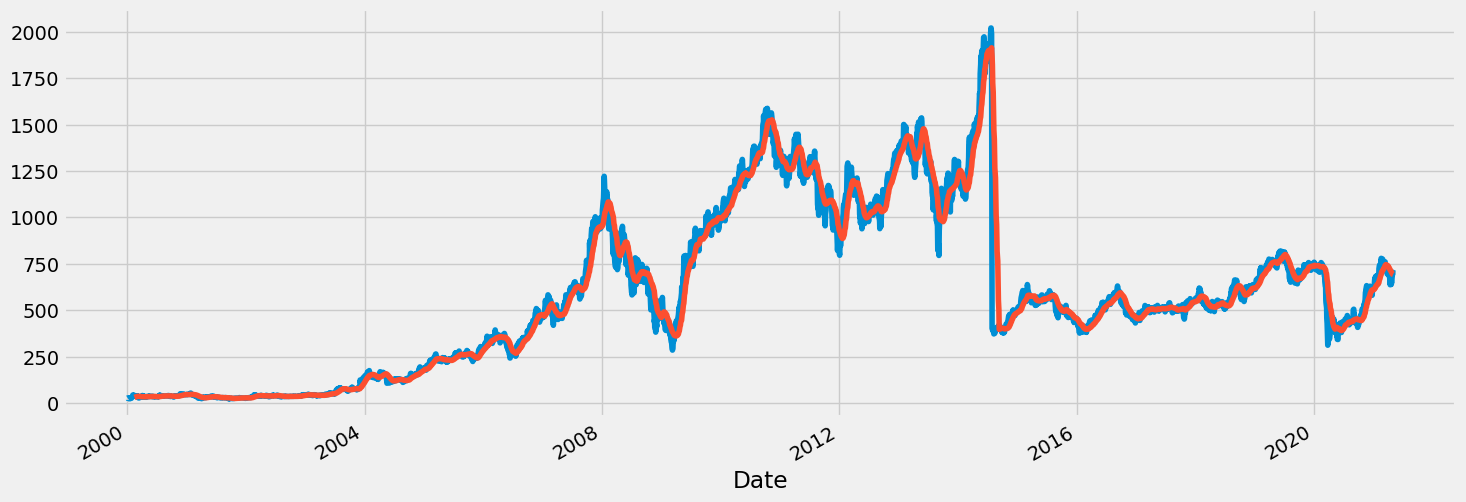

In [29]:
df_vwap['VWAP'].plot()
df_vwap.rolling(window=30).mean()['VWAP'].plot(figsize=(16, 6))

#**Conclusion**


Python's pandas library is a versatile powerhouse equipped with a myriad of functions tailored for dissecting time series data. This discussion highlighted the utility of pandas in managing and visualizing time series data.

My practical journey involved essential tasks like time sampling, shifting, and rolling with stock data—fundamental steps in any time series analysis. Looking ahead, we contemplate a basic financial analysis. This entails gauging stock price volatility through the calculation of daily percentage changes.

The narrative extends further, delving into the realm of machine learning. Imagine employing these techniques to predict Maruti's stock prices in the upcoming days—a valuable prospect, especially for stakeholders.

